In [1]:
# Datset source
# https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [2]:
# Problem Statement: Predict the scaled sound pressure level of airfoils at various wind tunnel speeds and angles of attack

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Read the dataset

import pandas as pd
afsn_df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None,
                 names=['frequency','angle_of_attack','chord_length','free_stream_velocity','suction_side_thickness','scaled_sound_level_dbs'])
print(afsn_df.shape)
afsn_df.head()

(1503, 6)


,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_thickness,scaled_sound_level_dbs
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
# Check for NAN values in the entire dataframe

afsn_df.isnull().sum().sum()

0

In [6]:
# Info about the dataframe

afsn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               1503 non-null   int64  
 1   angle_of_attack         1503 non-null   float64
 2   chord_length            1503 non-null   float64
 3   free_stream_velocity    1503 non-null   float64
 4   suction_side_thickness  1503 non-null   float64
 5   scaled_sound_level_dbs  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
# Some statistics about the dataframe

afsn_df.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_thickness,scaled_sound_level_dbs
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


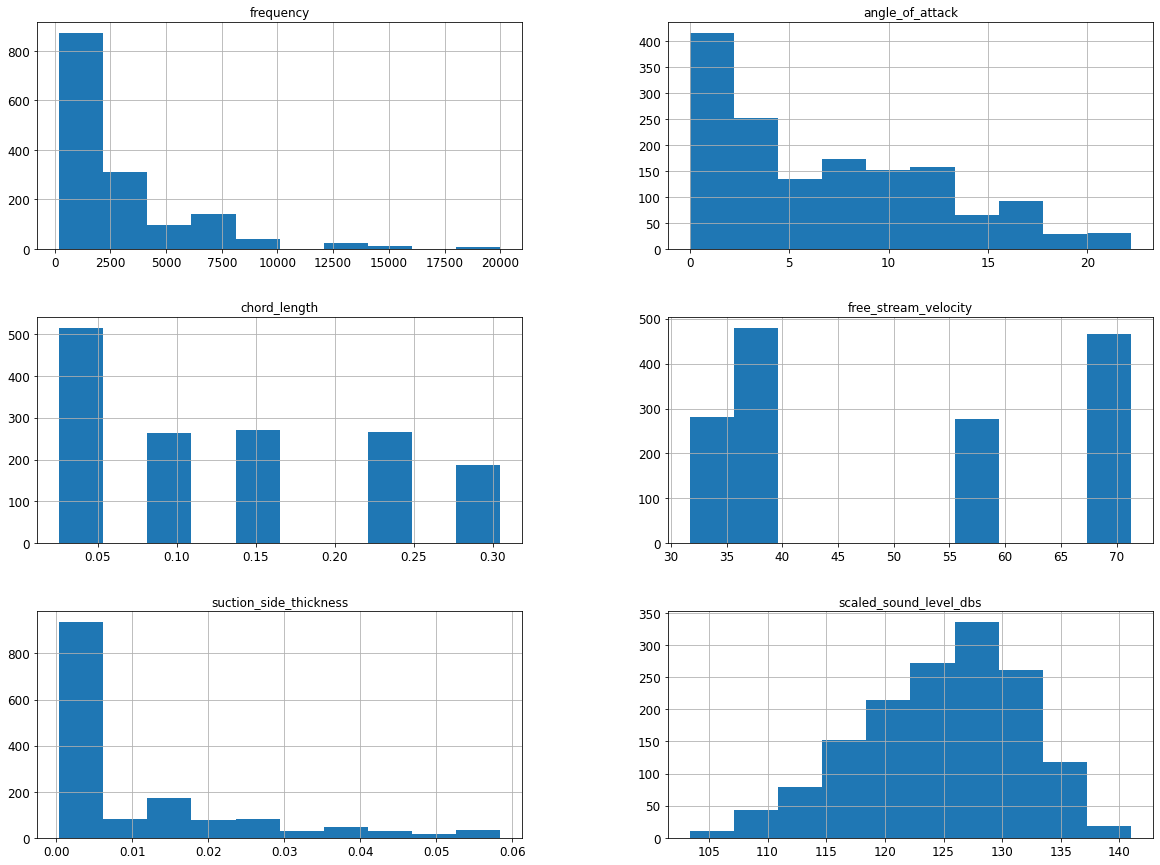

In [8]:
# Plot the histograms for all the features in the dataset

afsn_df.hist(bins=10, figsize=(20,15))
plt.show()

In [9]:
# To make this notebook's output identical at every run

np.random.seed(2)

In [10]:
# Plot correlation between scaled sound level in decibels and other features

corr_matrix = afsn_df.corr()
corr_matrix["scaled_sound_level_dbs"].sort_values(ascending=False)

scaled_sound_level_dbs    1.000000
free_stream_velocity      0.125103
angle_of_attack          -0.156108
chord_length             -0.236162
suction_side_thickness   -0.312670
frequency                -0.390711
Name: scaled_sound_level_dbs, dtype: float64

In [11]:
# Split the dataframe into features and labels

X = afsn_df.drop(['scaled_sound_level_dbs'], axis=1).values
y = afsn_df.loc[:, 'scaled_sound_level_dbs'].values
print("X shape: ", X.shape, "y shape: ", y.shape)
print("Sample X values: ", X[:5], "\n", "Sample y values: ", y[:5], )

X shape:  (1503, 5) y shape:  (1503,)
Sample X values:  [[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.60000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [2.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]] 
 Sample y values:  [126.201 125.201 125.951 127.591 127.461]


In [12]:
# Split the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=2)
print(" X_train shape: ", X_train.shape,"\n", "y_train shape: ", y_train.shape,"\n",
     "X_val shape: ", X_val.shape,"\n", "y_val shape: ", y_val.shape,"\n",
     "X_test shape: ", X_test.shape,"\n", "y_test shape: ", y_test.shape,"\n")

 X_train shape:  (1355, 5) 
 y_train shape:  (1355,) 
 X_val shape:  (72, 5) 
 y_val shape:  (72,) 
 X_test shape:  (76, 5) 
 y_test shape:  (76,) 



In [13]:
# Model 1
# Sklearn Simple Linear Regression model with default parameters

from sklearn.linear_model import LinearRegression
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)
print("Train set score: ", lr_model_1.score(X_train, y_train))
print("Validation set score: ", lr_model_1.score(X_val, y_val))
print("Test set score: ", lr_model_1.score(X_test, y_test))

Train set score:  0.5083207431125139
Validation set score:  0.5334522467480627
Test set score:  0.5927084532366732


In [14]:
# Mean Squared Errors of train, validation and test set predictions

from sklearn.metrics import mean_squared_error
print("Train set mse: ", mean_squared_error(y_train, lr_model_1.predict(X_train)))
print("Validation set mse: ", mean_squared_error(y_val, lr_model_1.predict(X_val)))
print("Test set mse: ", mean_squared_error(y_test, lr_model_1.predict(X_test)))

Train set mse:  22.926622205057754
Validation set mse:  28.175438742771675
Test set mse:  20.277244806895762


In [15]:
# Here the R^2 values are low and MSE values are high, more complex models are required to fit the data

In [16]:
# Model 2
# Sklearn Simple Linear Regression model with normalized data

from sklearn.linear_model import LinearRegression
lr_model_2 = LinearRegression(normalize=True)
lr_model_2.fit(X_train, y_train)
print("Train set score: ", lr_model_2.score(X_train, y_train))
print("Validation set score: ", lr_model_2.score(X_val, y_val))
print("Test set score: ", lr_model_2.score(X_test, y_test))

Train set score:  0.5083207431125139
Validation set score:  0.5334522467480627
Test set score:  0.592708453236674


In [17]:
# Here normalizing the data didn't made any difference, confirming that more complex models are required to fit the data